In [1]:
import numpy as np
import xray
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (4096 ,4096 ))
resource.getrlimit(resource.RLIMIT_NOFILE)


(4096, 4096)

In [3]:
import mdsxray
reload(mdsxray)

<module 'mdsxray' from 'mdsxray.pyc'>

In [4]:
iters = range(480, 210240, 480)
ddir = '/data/scratch/rpa/SOSE/run_np240'
store = mdsxray.MDSDataStore(ddir, iters, deltaT=900, prefix=['SOstt_5d',])
ds = xray.Dataset.load_store(store)
ds

mdsxray.py:200: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xray.Dataset>
Dimensions:  (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 41, time: 437)
Coordinates:
  * Xp1      (Xp1) >f4 5.55112e-17 0.166667 0.333333 0.5 0.666667 0.833333 ...
  * Zl       (Zl) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * Yp1      (Yp1) >f4 -77.9583 -77.7916 -77.625 -77.4583 -77.2916 -77.125 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * Y        (Y) >f4 -77.875 -77.7083 -77.5416 -77.375 -77.2083 -77.0416 ...
  * X        (X) >f4 0.0833333 0.25 0.416667 0.583333 0.75 0.916667 1.08333 ...
  * Z        (Z) >f4 -5.0 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
  * Zu       (Zu) >f4 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
  * time     (time) int64 432000 864000 1296000 1728000 2160000 2592000 ...
Data variables:
    YC       (Y, X) >f4 -77.875 -77.875 -77.875 -77.875 -77.875 -77.875 ...
    YG       (Yp1, Xp1) >f4 -77.9583 -77.9583 -77.9583 -77.9583 -77.9583 ...
  

In [5]:
points = [
    ('Eastern Weddell', 335, -70),
    ('Western Weddell', 305, -70),
    ('Northern Weddell', 320, -62),
    ('East Antarctic Peninsula', 285, -66),
    ('Amundsen Sea', 240, -70),
    ('Eastern Ross', 210, -72),
    ('Western Ross', 180, -72),
    ('Wilkes Land', 100, -64)
]
reg_names, x_pts, y_pts = zip(*points)

In [9]:
ds_pts = ds.sel_points(X=x_pts, Y=y_pts, method='nearest')
ds_pts

<xray.Dataset>
Dimensions:  (Xp1: 2160, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 41, points: 8, time: 437)
Coordinates:
  * Xp1      (Xp1) >f4 5.55112e-17 0.166667 0.333333 0.5 0.666667 0.833333 ...
  * Zl       (Zl) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * Yp1      (Yp1) >f4 -77.9583 -77.7916 -77.625 -77.4583 -77.2916 -77.125 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * Z        (Z) >f4 -5.0 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
  * Zu       (Zu) >f4 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
  * time     (time) int64 432000 864000 1296000 1728000 2160000 2592000 ...
    X        (points) float32 334.917 304.917 319.917 284.917 239.917 ...
    Y        (points) float32 -70.0416 -70.0416 -62.0416 -66.0416 -70.0416 ...
  * points   (points) int64 0 1 2 3 4 5 6 7
Data variables:
    YG       (Yp1, Xp1) >f4 -77.9583 -77.9583 -77.9583 -77.9583 -77.9583 ...
    XG       (Yp1, Xp1) >f4 5.55112e-17 0.16

In [10]:
%time S = ds_pts['SALT'].load()
%time T = ds_pts['THETA'].load()

CPU times: user 3.23 s, sys: 737 ms, total: 3.97 s
Wall time: 3.68 s
CPU times: user 4.97 s, sys: 33.7 s, total: 38.7 s
Wall time: 37min 39s


In [22]:
import jmd95
prho, _, _ = jmd95.eos(0., T.values.ravel(), S.values.ravel())
prho.shape = T.shape
prho = xray.DataArray(prho-1000., coords=T.coords, attrs=T.attrs)

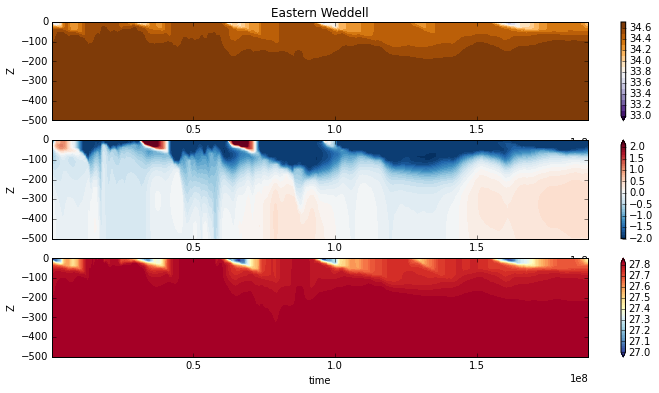

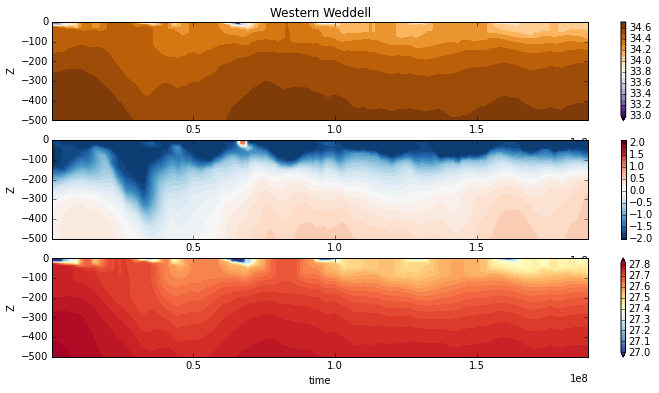

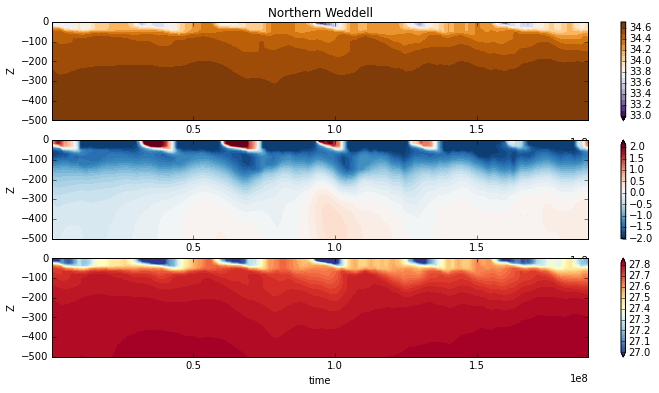

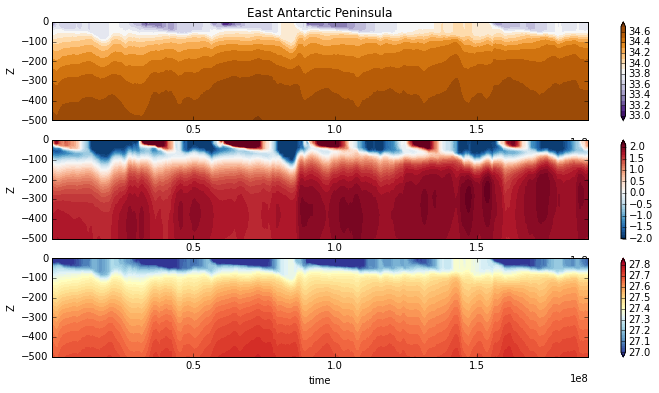

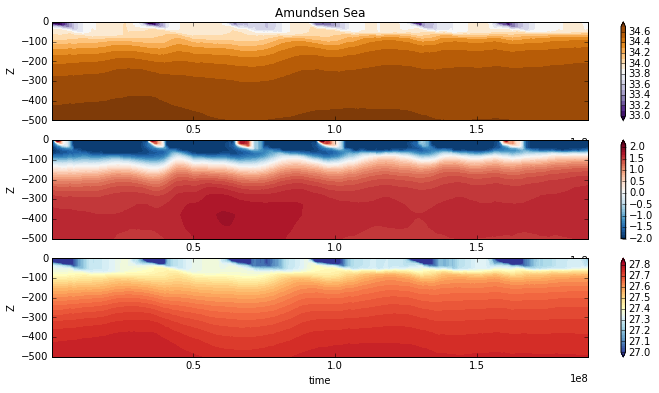

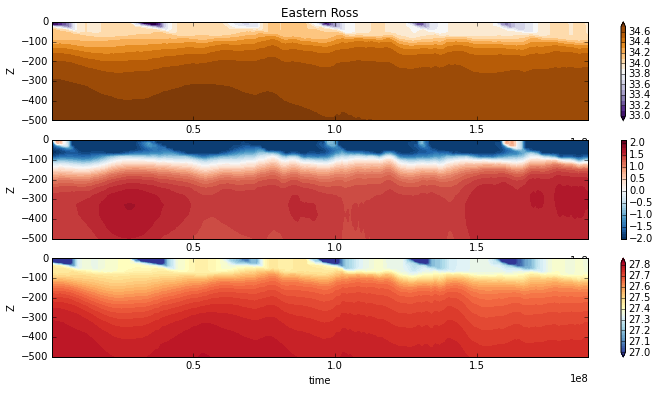

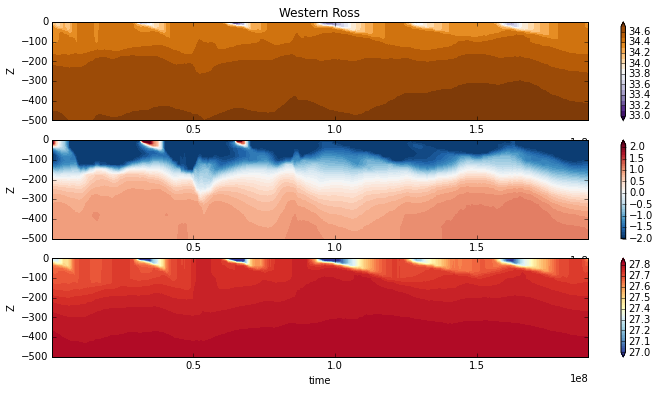

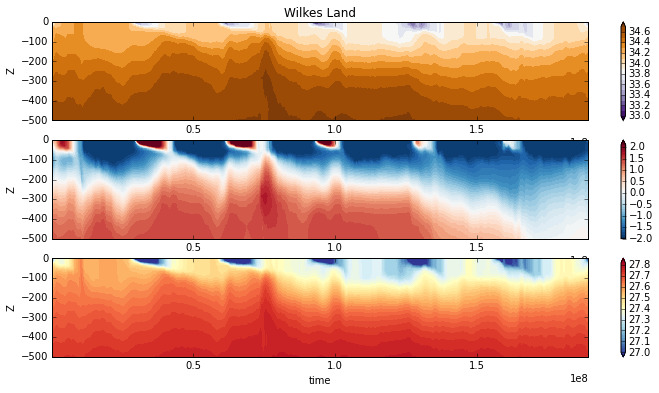

In [25]:
Slevs = np.arange(33,34.7,0.1)
Tlevs = np.arange(-2.0,2.2, 0.1)
Rholevs = np.arange(27,27.82,0.02)
for n, (pt_name, lon, lat) in enumerate(points):
    plt.figure(figsize=(12,6))
    plt.subplot(311)
    xray.plot.contourf(S[n].T, levels=Slevs, cmap='PuOr_r')
    plt.ylim([-500,0])
    plt.title(pt_name)
    plt.subplot(312)
    xray.plot.contourf(T[n].T, levels=Tlevs, cmap='RdBu_r')
    plt.ylim([-500,0])
    plt.subplot(313)
    xray.plot.contourf(prho[n].T, levels=Rholevs, cmap='RdYlBu_r')
    plt.ylim([-500,0])

In [66]:
# very slow
#%time s_weddel = salt.sel_points(X=[320,], Y=[-70,], method='nearest').load()
#%time s_weddel = salt.isel_points(X=[1920,], Y=[48,]).load()
%time s_weddel = salt[:,:,48,1920].load()

CPU times: user 993 µs, sys: 0 ns, total: 993 µs
Wall time: 1.22 ms


In [67]:
#%time s_ross = salt.sel_points(X=[100,], Y=[-65,], method='nearest').load()
%time s_ross = salt[:,:,30,1100].load()

CPU times: user 1.08 ms, sys: 31 µs, total: 1.11 ms
Wall time: 928 µs


<matplotlib.colorbar.Colorbar instance at 0x7ebf7b501f38>

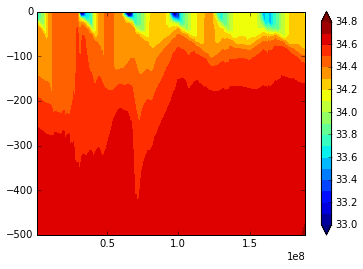

In [69]:
plt.contourf(s_weddel['time'], s_weddel['Z'], 
             np.ma.masked_less(s_ross.T, 30),
             np.arange(33,34.9,0.1), extend='both')
plt.ylim([-500,0])
plt.colorbar()

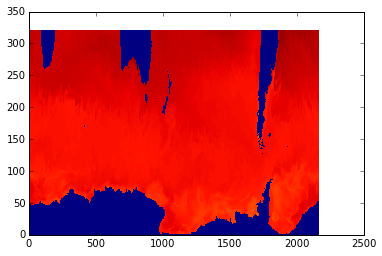

In [35]:
plt.pcolormesh(salt[0,0].values)

In [41]:
2160-240

1920

In [46]:
s_weddel

<xray.DataArray 'SALT' (time: 437, Z: 42)>
array([[ 33.02706909,  33.76606369,  34.10088348, ...,   0.        ,
          0.        ,   0.        ],
       [ 32.91879272,  33.80007172,  34.1042366 , ...,   0.        ,
          0.        ,   0.        ],
       [ 32.8830452 ,  33.78821564,  34.10359192, ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ 34.19711304,  34.2787323 ,  34.28631592, ...,   0.        ,
          0.        ,   0.        ],
       [ 34.12483597,  34.25611877,  34.28620148, ...,   0.        ,
          0.        ,   0.        ],
       [ 34.132164  ,  34.15496063,  34.27939224, ...,   0.        ,
          0.        ,   0.        ]], dtype=float32)
Coordinates:
    X        >f4 320.083
  * time     (time) int64 432000 864000 1296000 1728000 2160000 2592000 ...
    Y        >f4 -69.875
  * Z        (Z) >f4 -5.0 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 -125.5 ...
Attributes:
    units: Salinity
    description: psu

In [71]:
del salt